In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('Final.csv')



df.head()



,Years,Months,Average of Charging Time (hh:mm:ss),Average of Energy (kWh),Average of GHG Savings (kg),Sum of Gasoline Savings (gallons)
0,2011,7,0.098697,8.048586,3.380444,9.091
1,2011,8,0.073523,5.693614,2.391301,97.178
2,2011,9,0.086560,6.917640,2.905420,152.797
3,2011,10,0.080149,6.662498,2.798236,247.504
4,2011,11,0.083049,6.699859,2.813965,261.498


In [25]:
# Check for rows containing "Grand Total"
invalid_rows = df[(df['Years'] == 'Grand Total') | (df['Months'] == 'Grand Total')]

# Remove rows containing "Grand Total"
df = df.drop(invalid_rows.index)

# Convert 'Years' and 'Months' columns to datetime format
df['Date'] = pd.to_datetime(df[['Years', 'Months']].assign(DAY=1))
df.drop(['Years', 'Months'], axis=1, inplace=True)
df.set_index('Date', inplace=True)

df.head()


,Average of Charging Time (hh:mm:ss),Average of Energy (kWh),Average of GHG Savings (kg),Sum of Gasoline Savings (gallons)
Date,,,,
2011-07-01,0.098697,8.048586,3.380444,9.091
2011-08-01,0.073523,5.693614,2.391301,97.178
2011-09-01,0.086560,6.917640,2.905420,152.797
2011-10-01,0.080149,6.662498,2.798236,247.504
2011-11-01,0.083049,6.699859,2.813965,261.498


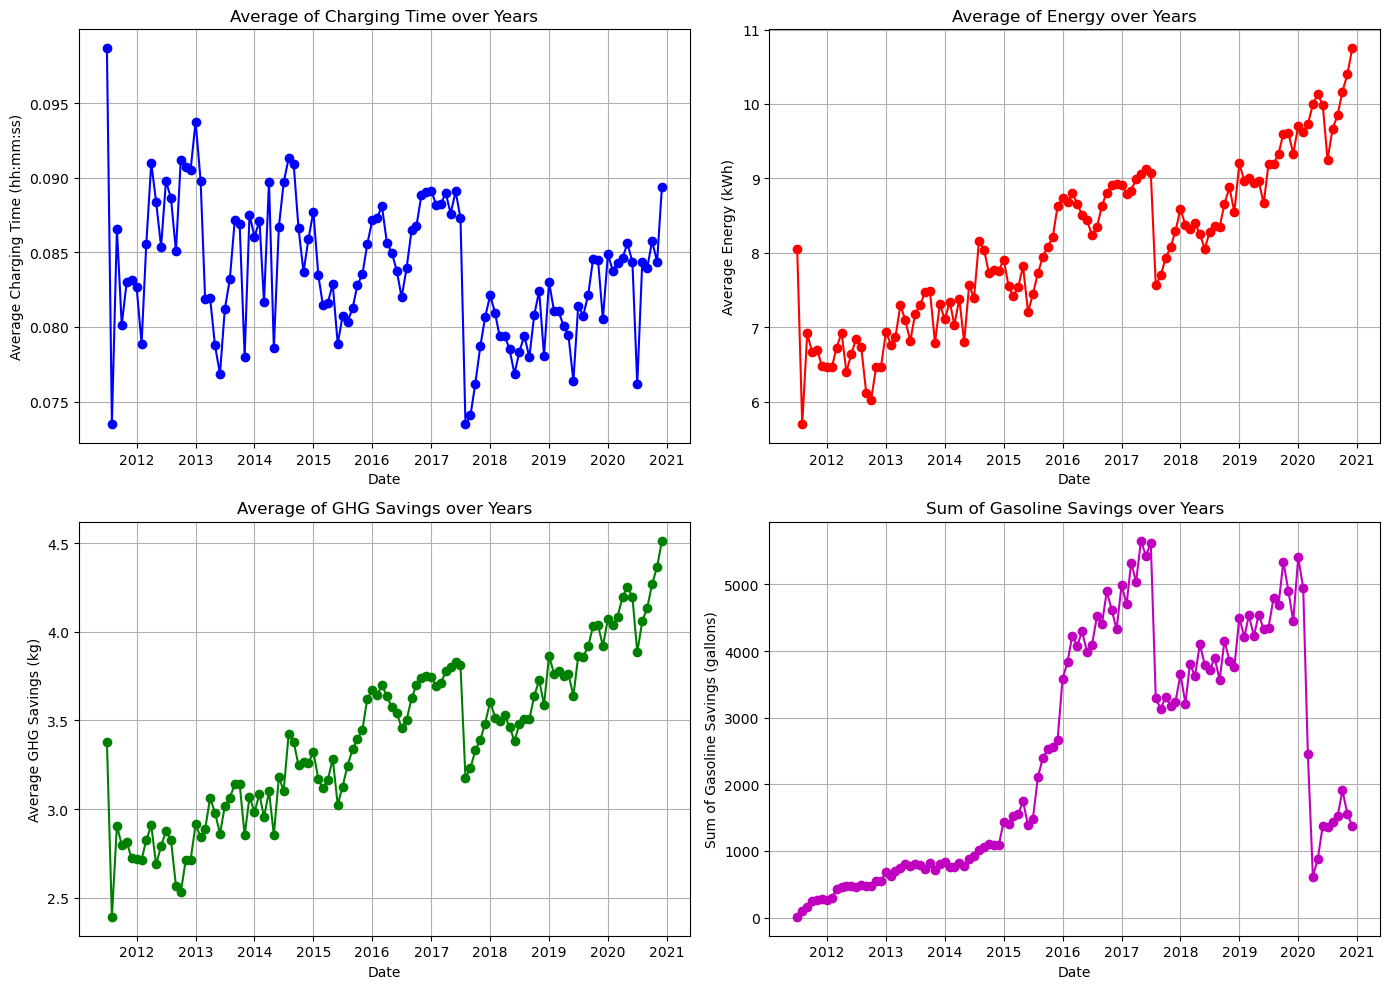

In [26]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(14, 10))

# Plot for 'Average of Charging Time (hh:mm:ss)'
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Average of Charging Time (hh:mm:ss)'], marker='o', color='b')
plt.title('Average of Charging Time over Years')
plt.xlabel('Date')
plt.ylabel('Average Charging Time (hh:mm:ss)')
plt.grid(True)

# Plot for 'Average of Energy (kWh)'
plt.subplot(2, 2, 2)
plt.plot(df.index, df['Average of Energy (kWh)'], marker='o', color='r')
plt.title('Average of Energy over Years')
plt.xlabel('Date')
plt.ylabel('Average Energy (kWh)')
plt.grid(True)

# Plot for 'Average of GHG Savings (kg)'
plt.subplot(2, 2, 3)
plt.plot(df.index, df['Average of GHG Savings (kg)'], marker='o', color='g')
plt.title('Average of GHG Savings over Years')
plt.xlabel('Date')
plt.ylabel('Average GHG Savings (kg)')
plt.grid(True)

# Plot for 'Sum of Gasoline Savings (gallons)'
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Sum of Gasoline Savings (gallons)'], marker='o', color='m')
plt.title('Sum of Gasoline Savings over Years')
plt.xlabel('Date')
plt.ylabel('Sum of Gasoline Savings (gallons)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [27]:
df.isnull().sum()

Average of Charging Time (hh:mm:ss)    0
Average of Energy (kWh)                0
Average of GHG Savings (kg)            0
Sum of Gasoline Savings (gallons)      0
dtype: int64

In [28]:
df.columns

Index(['Average of Charging Time (hh:mm:ss)', 'Average of Energy (kWh)',
       'Average of GHG Savings (kg)', 'Sum of Gasoline Savings (gallons)'],
      dtype='object')

In [11]:
pip install sktime

  Obtaining dependency information for sktime from https://files.pythonhosted.org/packages/90/4c/ef5aa0d46210e974df138cc014955d2d5acb6d36af0ce1ee145d276e4a35/sktime-0.26.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-base<0.8.0 from https://files.pythonhosted.org/packages/4f/ce/23328fdabd7bf0ec942888e0bf41105cdb24f132606b17787ee06cf8087a/scikit_base-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/21.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/21.8 MB 960.0 kB/s eta 0:00:23
   - -------------------------------------- 0.7/21.8 MB 8.4 MB/s eta 0:00:03
   -- ------------------------------------- 1.4/21.8 MB 11.0 MB/s eta 0:00:02
   --- ------------------------------------ 2.0/21.8 MB 11.5 MB/s eta 0:00:02
   --- ------------------------------------ 2.1/21.8 MB 11.1 MB/s eta 0:00:02
   ---- ----------------------------------- 2.4/21.8 MB 9.4 MB/s eta 0:00:03
   ---- ----------------------------------- 2.7/21.8

In [29]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
from sktime.utils.plotting import plot_series
import sys
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df

,Average of Charging Time (hh:mm:ss),Average of Energy (kWh),Average of GHG Savings (kg),Sum of Gasoline Savings (gallons)
Date,,,,
2011-07-01,0.098697,8.048586,3.380444,9.091
2011-08-01,0.073523,5.693614,2.391301,97.178
2011-09-01,0.086560,6.917640,2.905420,152.797
2011-10-01,0.080149,6.662498,2.798236,247.504
2011-11-01,0.083049,6.699859,2.813965,261.498
...,...,...,...,...
2020-08-01,0.084348,9.666274,4.059837,1426.624
2020-09-01,0.083966,9.847391,4.135903,1518.865
2020-10-01,0.085763,10.167355,4.270292,1907.627


In [32]:
def sktime_forecast(dataset, horizon, forecaster, validation=False, confidence=0.9, frequency="M"):
    forecast_df = dataset.resample(rule=frequency).sum()
    forecast_df = forecast_df.interpolate(method="time")
    for col in dataset.columns:

        # Use train/test split to validate forecaster
        if validation:
            df = forecast_df[col]

            y_train = df[:-horizon]
            y_test = df.tail(horizon)

            forecaster.fit(y_train)
            fh = ForecastingHorizon(y_test.index, is_relative=False)
            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            y_true = df.tail(horizon)
            mae = mean_absolute_error(y_true, y_pred)
        if not validation:
            df = forecast_df[col].dropna()
            forecaster.fit(df)

            last_date = df.index.max()
            fh = ForecastingHorizon(
                pd.date_range(str(last_date), periods=horizon, freq=frequency),
                is_relative=False,
            )
            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            mae = np.nan
        plt.plot(
            df.tail(horizon * 3),
            label="Actual",
            color="black",
        )
        plt.gca().fill_between(
            ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1
        )
        plt.plot(y_pred, label="Predicted")
        # plt.title(
        #     f"{horizon} day forecast for {col} (mae: {round(mae, 2)}, confidence: {confidence*100}%)"
        # )
        plt.ylim(bottom=0)
        # plt.legend()
        plt.grid(False)
        plt.show()
        

    

In [35]:
pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5b/a0/a0f4a556dff2189bc08d0f69f0d4aac1b7e4e0cedc9a70b30a134f73d100/cmdstanpy-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/e2/42/04d07feeb46fa0d260aa5d9431311d31517b797f7b268d32506cb9de31c3/holidays-0.42-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/packages/26/01/e2579afa3ad1eade8b54bf5b9e45790d219681b1f8f97edbd2f1

20:30:24 - cmdstanpy - INFO - Chain [1] start processing
20:30:25 - cmdstanpy - INFO - Chain [1] done processing


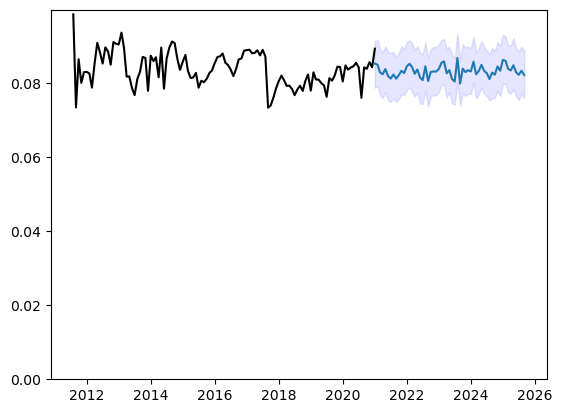

20:30:26 - cmdstanpy - INFO - Chain [1] start processing
20:30:26 - cmdstanpy - INFO - Chain [1] done processing


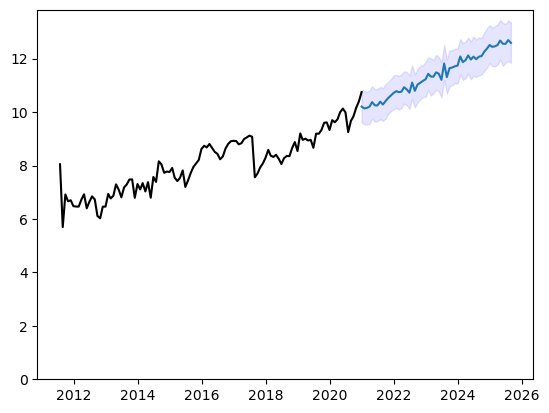

20:30:27 - cmdstanpy - INFO - Chain [1] start processing
20:30:28 - cmdstanpy - INFO - Chain [1] done processing


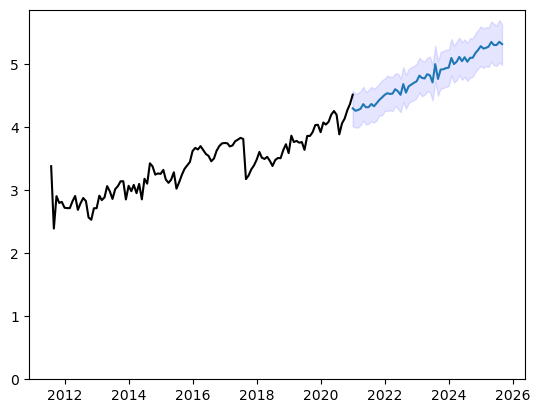

20:30:29 - cmdstanpy - INFO - Chain [1] start processing
20:30:29 - cmdstanpy - INFO - Chain [1] done processing


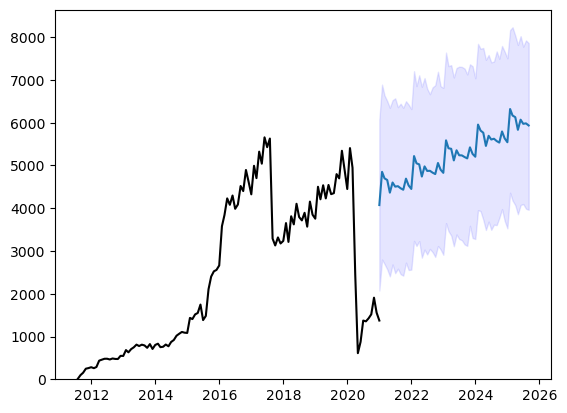

In [36]:
forecaster = Prophet(yearly_seasonality=True)
sktime_forecast(dataset=df, horizon=57, forecaster=forecaster, validation=False)

In [38]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/85/7d/58635941dfbb5b4e197adb88080b9cbfb230dc3b75683698a530a1989bdb/Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   --- ------------------------------------ 61.4/614.7 kB 1.6 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/614.7 kB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------- ----------------------------- 0.7/2.8 MB 14.6 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.8 MB 14.2 MB/s eta 0:00:01
   ----------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


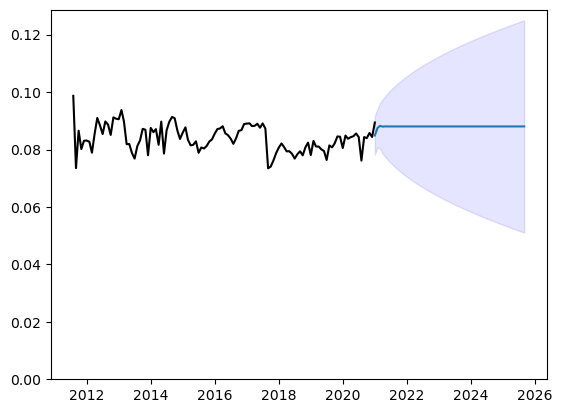

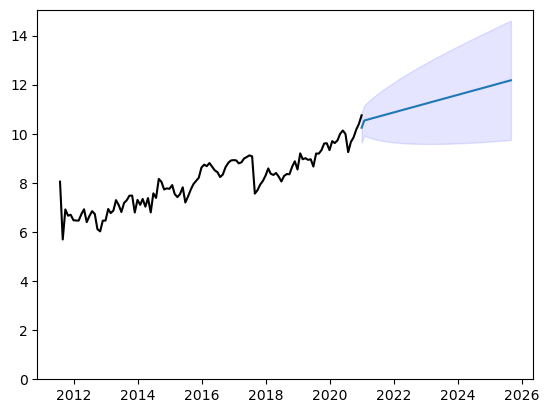

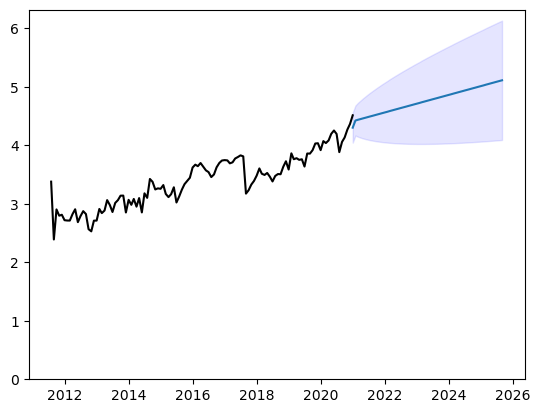

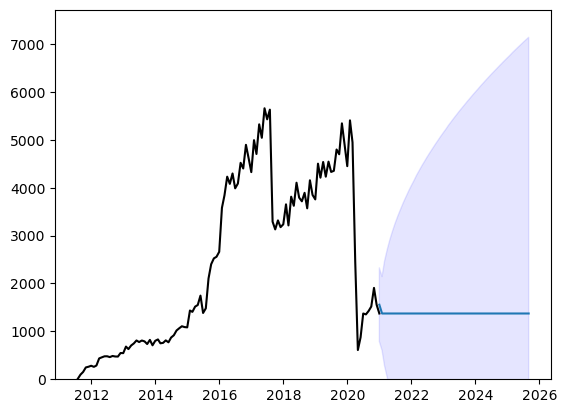

In [40]:
forecaster = AutoARIMA(sp=1, suppress_warnings=True)
sktime_forecast(dataset=df, horizon=57, forecaster=forecaster, validation=False)

NameError: name 'y_test' is not defined